<a href="https://colab.research.google.com/github/Ananya-AJ/CMPE255-Data-Mining/blob/main/Assignment2-pycaret-gradio/BinaryClassification_with_gradio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing gradio and pycaret and its dependencies

In [ ]:
!pip install -q gradio

     |████████████████████████████████| 6.1 MB 4.8 MB/s 
     |████████████████████████████████| 57 kB 5.1 MB/s 
     |████████████████████████████████| 55 kB 3.2 MB/s 
     |████████████████████████████████| 2.3 MB 35.7 MB/s 
     |████████████████████████████████| 84 kB 2.6 MB/s 
     |████████████████████████████████| 112 kB 43.6 MB/s 
     |████████████████████████████████| 270 kB 19.3 MB/s 
     |████████████████████████████████| 84 kB 1.9 MB/s 
     |████████████████████████████████| 212 kB 36.9 MB/s 
     |████████████████████████████████| 54 kB 2.6 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 80 kB 7.9 MB/s 
     |████████████████████████████████| 68 kB 4.5 MB/s 
     |████████████████████████████████| 43 kB 1.8 MB/s 
     |████████████████████████████████| 4.0 MB 32.7 MB/s 
     |████████████████████████████████| 856 kB 48.7 MB/s 
     |████████████████████████████████| 594 kB 57.5 MB/s 


In [ ]:
!pip install pycaret --user
!pip install Jinja2==2.11.3
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 5.1 MB/s 
     |████████████████████████████████| 3.3 MB 38.7 MB/s 
     |████████████████████████████████| 1.3 MB 41.9 MB/s 
     |████████████████████████████████| 1.7 MB 36.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8 MB 38.1 MB/s 
     |████████████████████████████████| 10.4 MB 39.5 MB/s 
     |████████████████████████████████| 17.0 MB 168 kB/s 
     |████████████████████████████████| 2.0 MB 38.8 MB/s 
     |████████████████████████████████| 636 kB 36.6 MB/s 
     |████████████████████████████████| 88 kB 6.8 MB/s 
     |████████████████████████████████| 25.9 MB 1.8 MB/s 
     |████████████████████████████████| 268 kB 47.5 MB/s 
     |████████████████████████████████

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


install pandas

In [ ]:
!pip install pandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset

  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 12.6MB/s]


To display interactive visuals

In [ ]:

from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:

from pycaret.classification import *
import pandas as pd

In [ ]:
! unzip stroke-prediction-dataset.zip

Archive:  stroke-prediction-dataset.zip
  inflating: healthcare-dataset-stroke-data.csv  


Reade healthecare-dataset-stroke-data into a pd and inf values are replaced with na., contains hot encoding and other code cleaning trials done and is commented.

In [ ]:
stroke_df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
#for col in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
 # stroke_df[col] = stroke_df[col].astype('category')
#for col in ['stroke']:
  #stroke_df[col] = stroke_df[col].astype('boolean')

#print(stroke_df.head())
stroke_df.shape
stroke_df1 = stroke_df.drop('id', axis=1)
print(stroke_df1.head())
stroke_df1.isnull().sum()
stroke_df1.describe()
#dropping ID column
"""stroke_df.drop(['id'],inplace=True,axis=1)
#dropping na records which were very few
stroke_df=stroke_df.dropna()
#encoding categorical data
stroke_df['gender'] = stroke_df['gender'].replace({'Male':0,'Female':1,'other':2})
stroke_df['ever_married'] = stroke_df['ever_married'].replace({'No':0,'Yes':1})
stroke_df['Residence_type'] = stroke_df['Residence_type'].replace({'Rural':0,'Urban':1})
stroke_df['work_type'] = stroke_df['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':3,'Never_worked':4})
stroke_df['smoking_status'] = stroke_df['smoking_status'].replace({'never smoked':0,'Unknown':1,'formerly smoked': 2,'smokes':3})
stroke_df.head()"""
stroke_df1.replace([np.inf, -np.inf], np.nan,inplace=True)


import pandas_profiling as pp
#pp.ProfileReport(stroke_df)





   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21   NaN     never smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1  


In [ ]:
corr=stroke_df1.corr()
corr

age  hypertension  heart_disease  avg_glucose_level  \
age                1.000000      0.276398       0.263796           0.238171   
hypertension       0.276398      1.000000       0.108306           0.174474   
heart_disease      0.263796      0.108306       1.000000           0.161857   
avg_glucose_level  0.238171      0.174474       0.161857           1.000000   
bmi                0.333398      0.167811       0.041357           0.175502   
stroke             0.245257      0.127904       0.134914           0.131945   

                        bmi    stroke  
age                0.333398  0.245257  
hypertension       0.167811  0.127904  
heart_disease      0.041357  0.134914  
avg_glucose_level  0.175502  0.131945  
bmi                1.000000  0.042374  
stroke             0.042374  1.000000

Based on correlation, removing columns with corr less than 0.5

adding all the setup variable to avoid explicit data cleaning as in above cell and to use data cleaning/normalizing/imputing methods offered by pycaret

In [ ]:


session = setup(stroke_df1, target='stroke', 
                feature_selection=True,
                ignore_features = ['gender','ever_married','work_type','Residence_type','smoking_status'],
                ignore_low_variance = True,
                numeric_iterative_imputer='rf',
                normalize=True, 
                remove_multicollinearity=True, 
                fix_imbalance=True,
                remove_outliers= True,
                profile=True,
                silent=True)

prep_pipe = get_config('prep_pipe') 
df0 = prep_pipe.transform(stroke_df1)

"""
data = stroke_df1.sample(frac=0.95, random_state=786)
data_unseen = stroke_df1.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))
#print(stroke_df.dtypes)
print(data.head())"""

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False,
                                      features_todrop=['gender', 'ever_married',
                                                       'work_type',
                                                       'Residence_type',
                                                       'smoking_status'],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='stroke',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_availabl...
                 Advanced_Feature_Selection_Classic(ml_usecase='cl

"\ndata = stroke_df1.sample(frac=0.95, random_state=786)\ndata_unseen = stroke_df1.drop(data.index)\ndata.reset_index(inplace=True, drop=True)\ndata_unseen.reset_index(inplace=True, drop=True)\nprint('Data for Modeling: ' + str(data.shape))\nprint('Unseen Data For Predictions: ' + str(data_unseen.shape))\n#print(stroke_df.dtypes)\nprint(data.head())"

In [ ]:
df0

In [ ]:
best_model = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
dummy                    Dummy Classifier    0.9597  0.5000  0.0000  0.0000   
lightgbm  Light Gradient Boosting Machine    0.9105  0.7710  0.1967  0.1248   
et                 Extra Trees Classifier    0.8949  0.7651  0.2341  0.1112   
rf               Random Forest Classifier    0.8920  0.7774  0.2637  0.1159   
dt               Decision Tree Classifier    0.8858  0.5420  0.1681  0.0740   
knn                K Neighbors Classifier    0.8148  0.7004  0.4824  0.1057   
gbc          Gradient Boosting Classifier    0.8098  0.8017  0.5698  0.1160   
ada                  Ada Boost Classifier    0.7601  0.8067  0.7011  0.1099   
lr                    Logistic Regression    0.7368  0.8381  0.7742  0.1093   
nb                            Naive Bayes    0.7206  0.8184  0.8038  0.1064   
qda       Quadratic Discriminant Analysis    0.7130  0.8268  0.8038  0.1041   
ridge                    Ridge Classifier    0.7089  0.0000  0.8181  0.1041   
lda          Linear Discriminant Analysis    0.7089  0.8374  0.8181  0.1041   
svm                   SVM - Linear Kernel    0.7071  0.0000  0.7725  0.1010   

              F1   Kappa     MCC  TT (Sec)  
dummy     0.0000  0.0000  0.0000     0.024  
lightgbm  0.1517  0.1076  0.1109     0.194  
et        0.1497  0.1011  0.1098     0.696  
rf        0.1607  0.1117  0.1231     1.016  
dt        0.1020  0.0502  0.0559     0.036  
knn       0.1731  0.1146  0.1578     0.133  
gbc       0.1926  0.1348  0.1919     0.523  
ada       0.1897  0.1292  0.2085     0.238  
lr        0.1914  0.1300  0.2218     0.385  
nb        0.1878  0.1256  0.2225     0.025  
qda       0.1842  0.1215  0.2179     0.026  
ridge     0.1847  0.1219  0.2209     0.024  
lda       0.1847  0.1219  0.2209     0.032  
svm       0.1780  0.1150  0.2046     0.035

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:DummyClassifier(constant=None, random_state=5506, strategy='prior')
INFO:logs:compare_models() succesfully completed......................................


Create a model

In [ ]:
#models()
best = compare_models(n_select = 15)
compare_model_results = pull()

Model  Accuracy     AUC  Recall   Prec.  \
dummy                    Dummy Classifier    0.9597  0.5000  0.0000  0.0000   
lightgbm  Light Gradient Boosting Machine    0.9105  0.7710  0.1967  0.1248   
et                 Extra Trees Classifier    0.8949  0.7651  0.2341  0.1112   
rf               Random Forest Classifier    0.8920  0.7774  0.2637  0.1159   
dt               Decision Tree Classifier    0.8858  0.5420  0.1681  0.0740   
knn                K Neighbors Classifier    0.8148  0.7004  0.4824  0.1057   
gbc          Gradient Boosting Classifier    0.8098  0.8017  0.5698  0.1160   
ada                  Ada Boost Classifier    0.7601  0.8067  0.7011  0.1099   
lr                    Logistic Regression    0.7368  0.8381  0.7742  0.1093   
nb                            Naive Bayes    0.7206  0.8184  0.8038  0.1064   
qda       Quadratic Discriminant Analysis    0.7130  0.8268  0.8038  0.1041   
ridge                    Ridge Classifier    0.7089  0.0000  0.8181  0.1041   
lda          Linear Discriminant Analysis    0.7089  0.8374  0.8181  0.1041   
svm                   SVM - Linear Kernel    0.7071  0.0000  0.7725  0.1010   

              F1   Kappa     MCC  TT (Sec)  
dummy     0.0000  0.0000  0.0000     0.022  
lightgbm  0.1517  0.1076  0.1109     0.118  
et        0.1497  0.1011  0.1098     0.691  
rf        0.1607  0.1117  0.1231     1.094  
dt        0.1020  0.0502  0.0559     0.040  
knn       0.1731  0.1146  0.1578     0.139  
gbc       0.1926  0.1348  0.1919     0.522  
ada       0.1897  0.1292  0.2085     0.239  
lr        0.1914  0.1300  0.2218     0.060  
nb        0.1878  0.1256  0.2225     0.024  
qda       0.1842  0.1215  0.2179     0.025  
ridge     0.1847  0.1219  0.2209     0.023  
lda       0.1847  0.1219  0.2209     0.029  
svm       0.1780  0.1150  0.2046     0.038

INFO:logs:create_model_container: 29
INFO:logs:master_model_container: 29
INFO:logs:display_container: 4
INFO:logs:[DummyClassifier(constant=None, random_state=5506, strategy='prior'), LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5506, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
          

linear regression

In [ ]:
lgbm = create_model('lightgbm')
#rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.9235  0.7682  0.2143  0.1667  0.1875  0.1480  0.1493
1       0.9118  0.8484  0.3571  0.1923  0.2500  0.2076  0.2189
2       0.9147  0.7579  0.1429  0.1053  0.1212  0.0775  0.0785
3       0.9206  0.6637  0.1429  0.1176  0.1290  0.0878  0.0883
4       0.8794  0.7524  0.1429  0.0645  0.0889  0.0341  0.0372
5       0.9000  0.7358  0.1429  0.0833  0.1053  0.0562  0.0585
6       0.9147  0.8098  0.2857  0.1739  0.2162  0.1739  0.1799
7       0.9263  0.8082  0.2308  0.1667  0.1935  0.1560  0.1582
8       0.9056  0.7310  0.1538  0.0870  0.1111  0.0653  0.0683
9       0.9086  0.8348  0.1538  0.0909  0.1143  0.0694  0.0721
Mean    0.9105  0.7710  0.1967  0.1248  0.1517  0.1076  0.1109
Std     0.0129  0.0528  0.0710  0.0434  0.0524  0.0556  0.0576

INFO:logs:create_model_container: 30
INFO:logs:master_model_container: 30
INFO:logs:display_container: 5
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5506, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
print(lgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5506, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


K Neighbors Classifier

In [ ]:
knn = create_model('knn')

Tuning a model

In [ ]:
#tuned_dt = tune_model(dt, optimize = 'AUC')
#tuned_rf = tune_model(rf, optimize = 'AUC')
#print(tuned_rf)
tuned_lgbm = tune_model(lgbm)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.9147  0.7702  0.2143  0.1429  0.1714  0.1284  0.1313
1       0.8941  0.8484  0.2143  0.1071  0.1429  0.0931  0.0995
2       0.9029  0.7511  0.2143  0.1200  0.1538  0.1067  0.1118
3       0.9059  0.6606  0.0714  0.0500  0.0588  0.0109  0.0111
4       0.8882  0.8008  0.2143  0.1000  0.1364  0.0850  0.0921
5       0.8971  0.7461  0.1429  0.0800  0.1026  0.0525  0.0550
6       0.9059  0.8109  0.3571  0.1786  0.2381  0.1938  0.2071
7       0.9056  0.8362  0.3077  0.1481  0.2000  0.1563  0.1682
8       0.9086  0.7471  0.2308  0.1250  0.1622  0.1183  0.1246
9       0.8909  0.8388  0.3077  0.1250  0.1778  0.1303  0.1457
Mean    0.9014  0.7810  0.2275  0.1177  0.1544  0.1075  0.1146
Std     0.0080  0.0549  0.0787  0.0344  0.0472  0.0490  0.0527

INFO:logs:create_model_container: 31
INFO:logs:master_model_container: 31
INFO:logs:display_container: 6
INFO:logs:LGBMClassifier(bagging_fraction=0.7, bagging_freq=1, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.15, max_depth=-1,
               min_child_samples=46, min_child_weight=0.001, min_split_gain=0.6,
               n_estimators=160, n_jobs=-1, num_leaves=20, objective=None,
               random_state=5506, reg_alpha=0.0001, reg_lambda=0.01,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


KNN

In [ ]:
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})
print(tuned_knn)

plot calibration

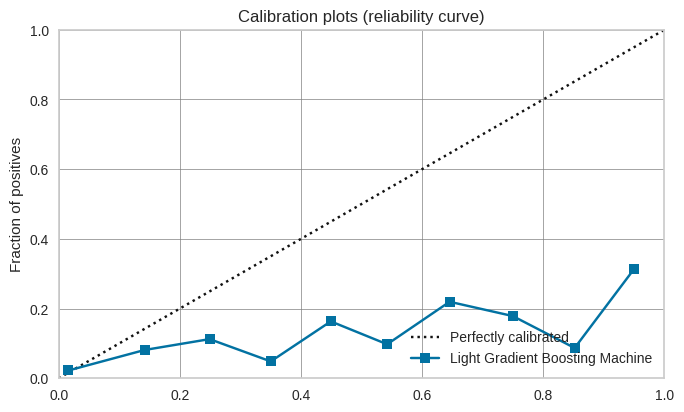

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lgbm, plot = 'calibration')

Precision recall curve

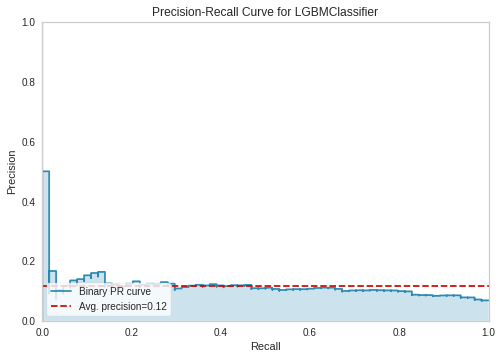

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lgbm, plot = 'pr')

Feature Importance plot

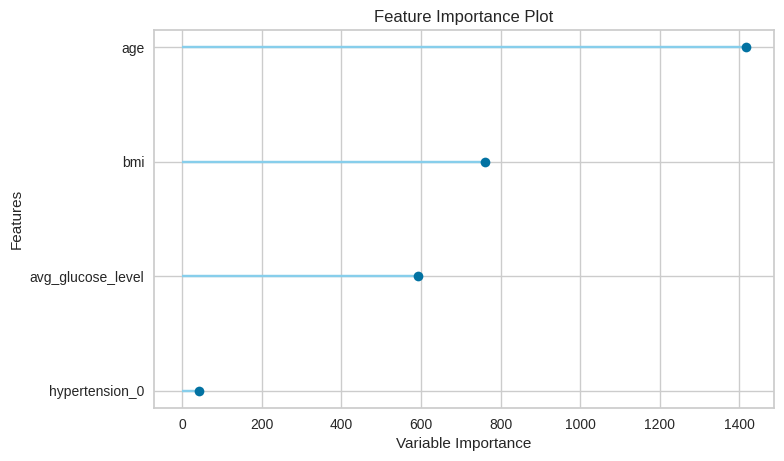

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lgbm, plot='feature')

Confusion Matrix

In [ ]:
plot_model(tuned_lgbm, plot = 'confusion_matrix')

In [ ]:
evaluate_model(tuned_lgbm)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMClassifier(bagging_fraction=0.7, bagging_freq=1, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.15, max_depth=-1,
               min_child_samples=46, min_child_weight=0.001, min_split_gain=0.6,
               n_estimators=160, n_jobs=-1, num_leaves=20, objective=None,
               random_state=5506, reg_alpha=0.0001, reg_lambda=0.01,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Predict on test

In [ ]:
predict_model(tuned_lgbm)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(bagging_fraction=0.7, bagging_freq=1, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.15, max_depth=-1,
               min_child_samples=46, min_child_weight=0.001, min_split_gain=0.6,
               n_estimators=160, n_jobs=-1, num_leaves=20, objective=None,
               random_state=5506, reg_alpha=0.0001, reg_lambda=0.01,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy    AUC  Recall   Prec.      F1  \
0  Light Gradient Boosting Machine    0.8918  0.788  0.3049  0.1866  0.2315   

    Kappa     MCC  
0  0.1769  0.1831

bmi  hypertension_0       age  avg_glucose_level  stroke  Label  \
0    -0.041940             0.0  1.157423          -0.665566       0      1   
1    -0.287316             1.0  1.423113          -0.781402       0      0   
2     1.326998             1.0 -0.392431          -0.785840       0      0   
3    -0.558521             1.0  1.290268          -0.296313       0      0   
4     0.255094             1.0  0.094666          -0.133876       0      0   
...        ...             ...       ...                ...     ...    ...   
1529 -0.222743             0.0  1.423113           2.852996       0      1   
1530 -0.364803             1.0 -0.259586          -0.719934       0      0   
1531  1.649861             1.0  0.980297           2.215456       0      1   
1532  0.138863             1.0  1.157423          -0.775854       0      0   
1533  0.565042             1.0  0.138948          -1.012407       0      0   

       Score  
0     0.8685  
1     0.5778  
2     0.9950  
3     0.7170  
4     0.6440  
...      ...  
1529  0.6698  
1530  0.9865  
1531  0.6029  
1532  0.6907  
1533  0.9779  

[1534 rows x 7 columns]

Finalize Model for Deployment

In [ ]:
final_lgbm = finalize_model(tuned_lgbm)
print(final_lgbm)

In [ ]:
predict_model(final_lgbm)

In [ ]:
unseen_predictions = predict_model(final_lgbm, data=data_unseen)
unseen_predictions.head()

In [ ]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['stroke'], unseen_predictions['Label'], metric = 'Accuracy')

0.9883

In [ ]:
save_model(final_lgbm,'Final Lightgbm Model 05sept2022')

Loading saved mocel

In [ ]:
saved_final_lgbm = load_model('Final Lightgbm Model 05sept2022')
new_prediction = predict_model(saved_final_lgbm, data=data_unseen)
new_prediction.head()

In [ ]:
from pycaret.utils import check_metric
check_metric(new_prediction['stroke'], new_prediction['Label'], metric = 'Accuracy')

0.9883

Use gradio to predict

In [ ]:
# creating a predict function to be passed into gradio UI
def predict(model, age, hypertension, heart_disease, avg_glucose_level,bmi):
  
    df = pd.DataFrame.from_dict({'age': [age], 'hypertension': [hypertension], 
                                 'heart_disease': [heart_disease], 'avg_glucose_level': [avg_glucose_level],
                                 'bmi': [bmi]})
    
    model_index = list(compare_model_results['Model']).index(model)
    model = best[model_index]
    pred = predict_model(model, df, raw_score=True)
    return {'stroke': pred['stroke'] 
            #pred['stroke'][0].astype('float64'), 
            }

In [ ]:
import gradio as gr

In [ ]:
create_app(tuned_lgbm)

In [ ]:
"""model = gr.inputs.Dropdown(list(compare_model_results['Model']), label="Model")
age = gr.inputs.Slider(minimum=1, maximum=100, default=stroke_df1['age'].mean(), label = 'age')
hypertension = gr.inputs.Slider(minimum = 0,maximum = 1,label='hypertension'),
#gr.inputs.Slider(minimum=0, maximum=1, default=stroke_df1['hypertension'].mean(), label = 'hypertension')
heart_disease = gr.inputs.Slider(minimum = 0,maximum = 1,label='heart_disease')
avg_glucose_level = gr.inputs.Slider(minimum=50, maximum=300, default=stroke_df1['avg_glucose_level'].mean(), label = 'avg_glucose_level')
bmi = gr.Slider(minimum = 2, maximum = 50, value=4, label='bmi'),
# gr.inputs.Slider(minimum=10, maximum=70, default=stroke_df1['bmi'].mean(), label = 'bmi')
gr.Interface(predict, [model,age,hypertension,heart_disease,avg_glucose_level,bmi], "label", live=True).launch()"""